# Control Aprendizaje No Supervisado

*Al finalizar, subir el notebook desarrollado a siveducMD*

**1.** Describa en qué consiste el análisis de componentes principales y cuáles son sus aplicaciones más comunes

In [10]:
library(cluster)
library(ggplot2)
library(mclust)

Package 'mclust' version 5.4.6
Type 'citation("mclust")' for citing this R package in publications.


El analisis de componentes principales es una técnica de reduccion dimensional en la cual estas nuevas dimensiones se forman a partir de combinaciones lineales de todas las dimensiones anteriores, los pesos de cada una de las dimensiones anteriores en esta combinacion lineal dependeran de que tanta informacion nos entreguen cada una de estas, mientras mas variabilidad en el conjunto de datos, podriamos decir que contiene mas informacion del conjunto de datos. La primera dimension se obtiene asi de directo: las variables que tienen mayor varianza seran las que tendran pesos mayores, para las dimensiones que siguen es algo similar, pero sujeto a la informacion que ya contienen la variables anteriores con tal de no redundar y que siempre sea información que no hemos capturado en las dimensiones anteriores (linealmente idependientes entre ellos) . En la practica simplemente es calcular los valores propios y los vectores asociados a cada uno de estos para la matriz de covarianza de la data.

Dentro de los usos de este algorito podemos encontrar: agrupamiento de especies, entre otros

**2.** Describa uno de los algoritmos de agrupamiento que hemos estudiado, indique ventajas, desventajas y dé un ejemplo de aplicación.



K-means comienza con unos puntos que representan los centros de los grupos puestos de de manera aleatorea, a traves de un proceso iterativo que consta de:

    1. asignación de los objetos a los grupos
    1. actualización de los pesos de los centroides 
    
Dentro de las ventajas podriamos mencionar que es un metodo facil de aprender, de entender y aplicar.

dentro de las desventajas: 
    no converge a un punto unico, por lo que los grupos que se formen dependerán en cierta medida de la posicion inicial de los puntos para los grupos.

**Parte práctica:** Considere los datos adjuntos provenientes de un estudio de contaminación del aire que contiene mediciones de la concentración diaria de ozono (ppb), la velocidad del viento (mph), la temperatura máxima diaria (grados F) y la radiación solar (langleys) en 111 días de mayo a septiembre de 1973 en Nueva York. 

**3.** Realice un análisis exploratorio de los datos. Interprete sus resultados.
    
**4.** Escoja un método de agrupamiento que estime es adecuado para tratar estos datos. Justifique su elección y desarrolle los agrupamientos correspondientes
    
**5.** Indique y justifique los valores de los parámetros utilizados. Itere si es necesario.
    
**6.** Grafique sus resultados utilizando una proyección de los datos en el primer plano de componentes principales. Interprete sus resultados.
  
  


In [11]:

datos <-read.csv("airPollution.csv",dec=",",header=TRUE,sep=";")
print(datos[1:10,])

   ozone radiation temperature wind
1     41       190          67  7.4
2     36       118          72  8.0
3     12       149          74 12.6
4     18       313          62 11.5
5     23       299          65  8.6
6     19        99          59 13.8
7      8        19          61 20.1
8     16       256          69  9.7
9     11       290          66  9.2
10    14       274          68 10.9


## 3) Analisis exploratorio

In [2]:
apply(datos, 2, var)
apply(datos,2,mean)

ozone   radiation temperature        wind 
 1107.29009  8308.74218    90.82031    12.66803

ozone   radiation temperature        wind 
  42.099099  184.801802   77.792793    9.938739

[1] "sdev"     "rotation" "center"   "scale"    "x"

[1] 1.5362936 0.9458106 0.6897738 0.5190919

ozone   radiation temperature        wind 
  42.099099  184.801802   77.792793    9.938739

ozone   radiation temperature        wind 
  33.275969   91.152302    9.529969    3.559218

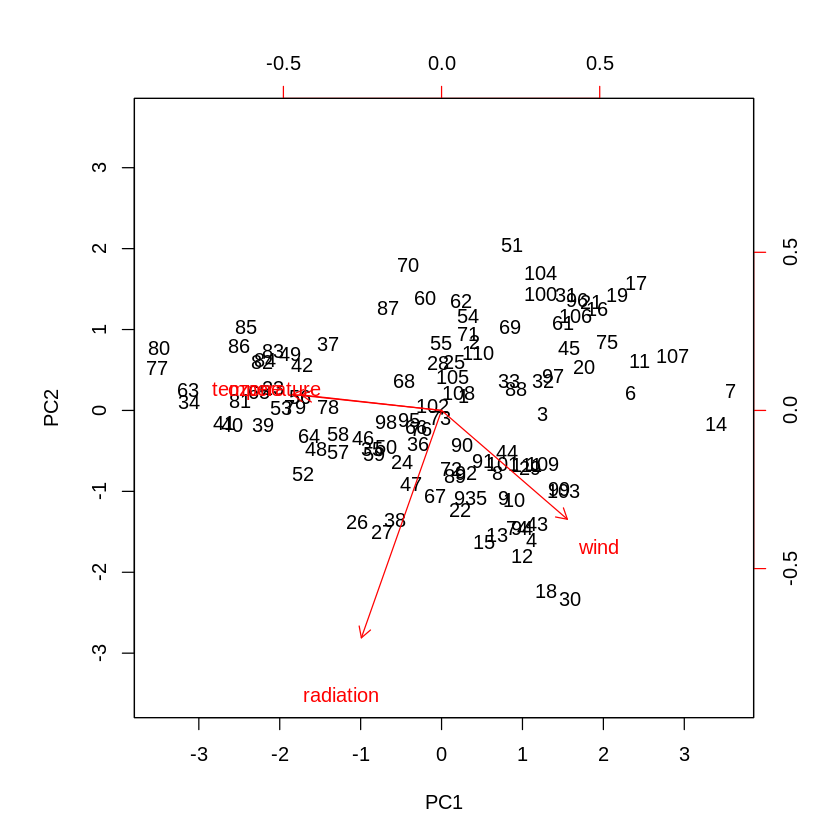

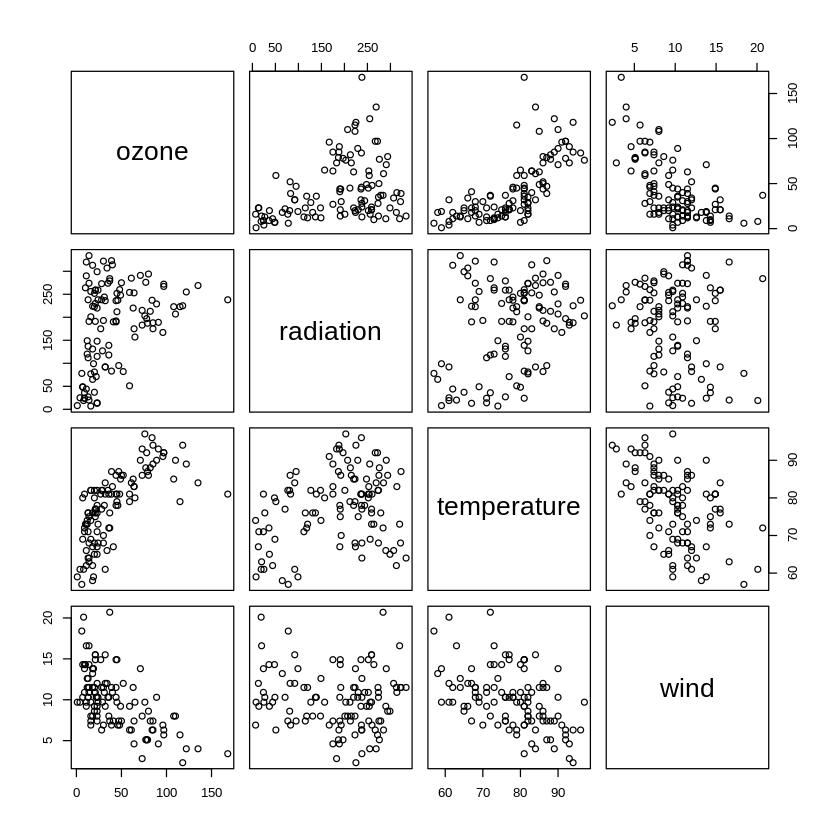

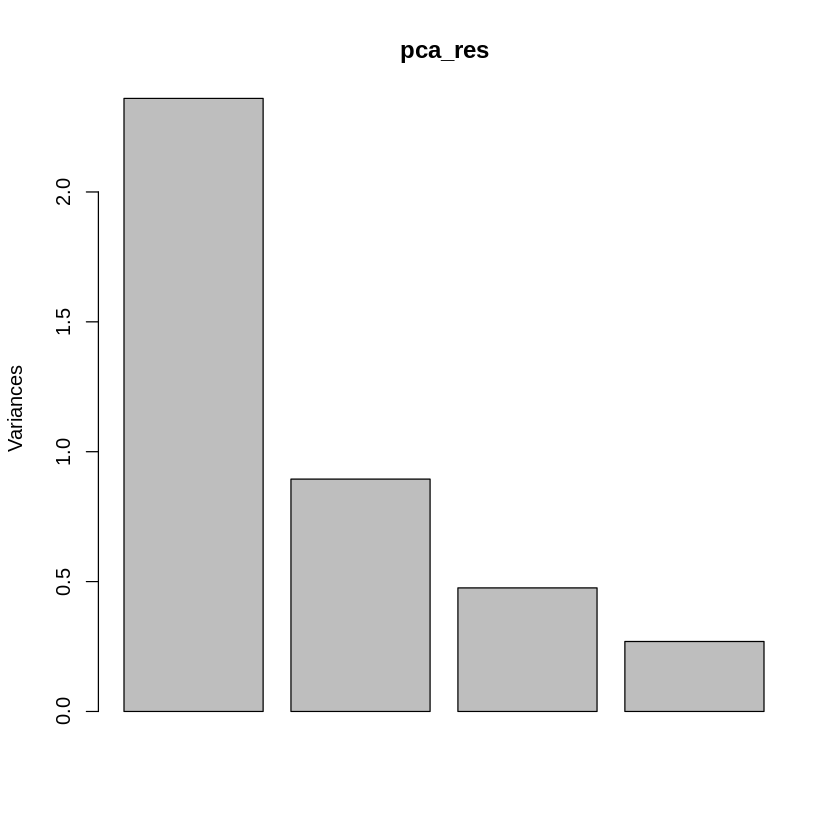

In [36]:
pca_res <- prcomp(datos, scale = TRUE)
names(pca_res)
pca_res$sdev
pca_res$rotation <- -pca_res$rotation
pca_res$center
pca_res$scale
pca_res$x <- -pca_res$x
biplot(pca_res, scale = 0)
pairs(datos)
plot(pca_res)

de los graficos anteriores se puede inferir que el ozono esta altamente correlacionado a la temperatura, que segun esto a mayor cantidad de viento los dias tienen menos temperatura y ozono, y que la radiación no esta relacionada con estos factores mencionados anteriormente


## 4, 5 y 6 de aqui hacia abajo

para responder la pregunta 4 utilizaremos GMM sin numeros de grupos definidos para explorar posibles conformaciones, puesto que fue con el que tuve mejores resultados la vez pasada y me gusta que tenga la nocion de distribución gaussiana ya que lo siento un poco menos "determinista" que un kmeans por ejemplo 

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EVI (diagonal, equal volume, varying shape) model with 4 components: 

 log-likelihood   n df       BIC       ICL
      -1761.051 111 32 -3672.808 -3693.565

Clustering table:
 1  2  3  4 
31 23 33 24 

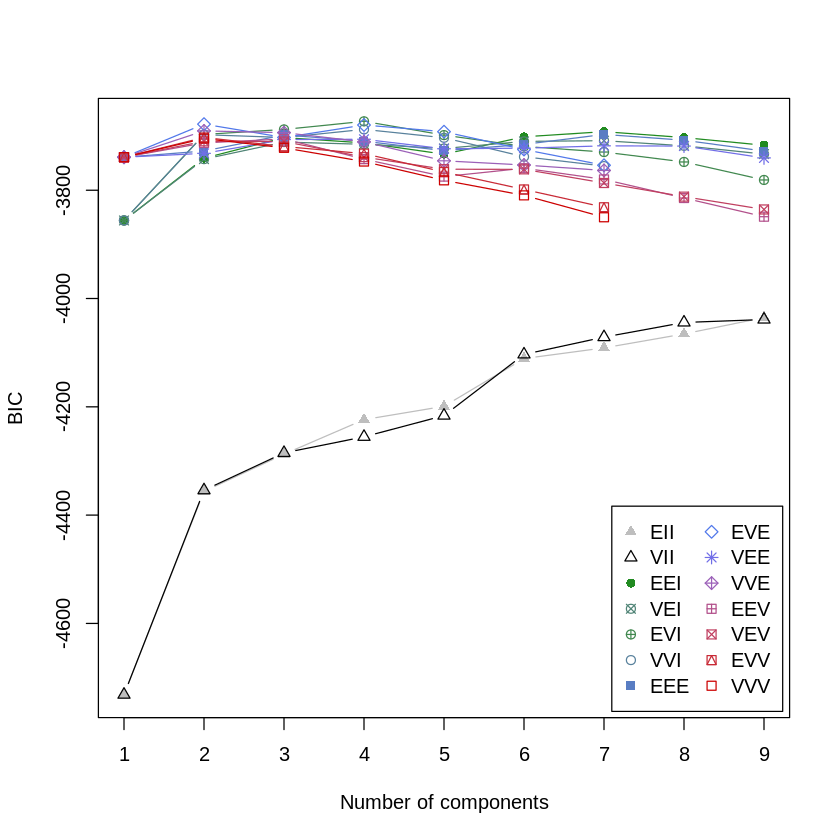

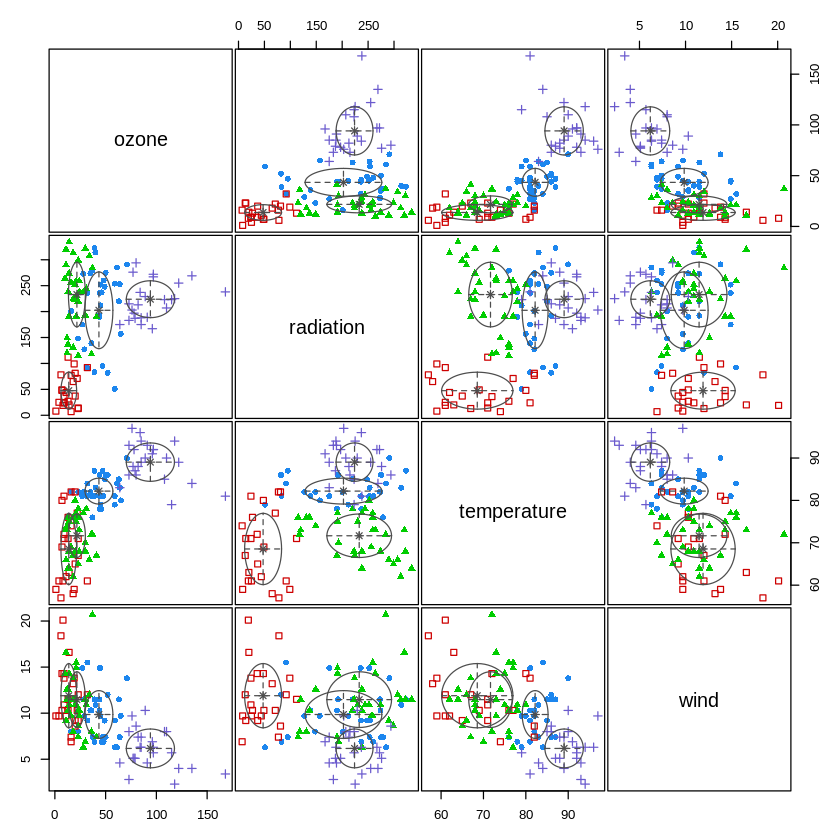

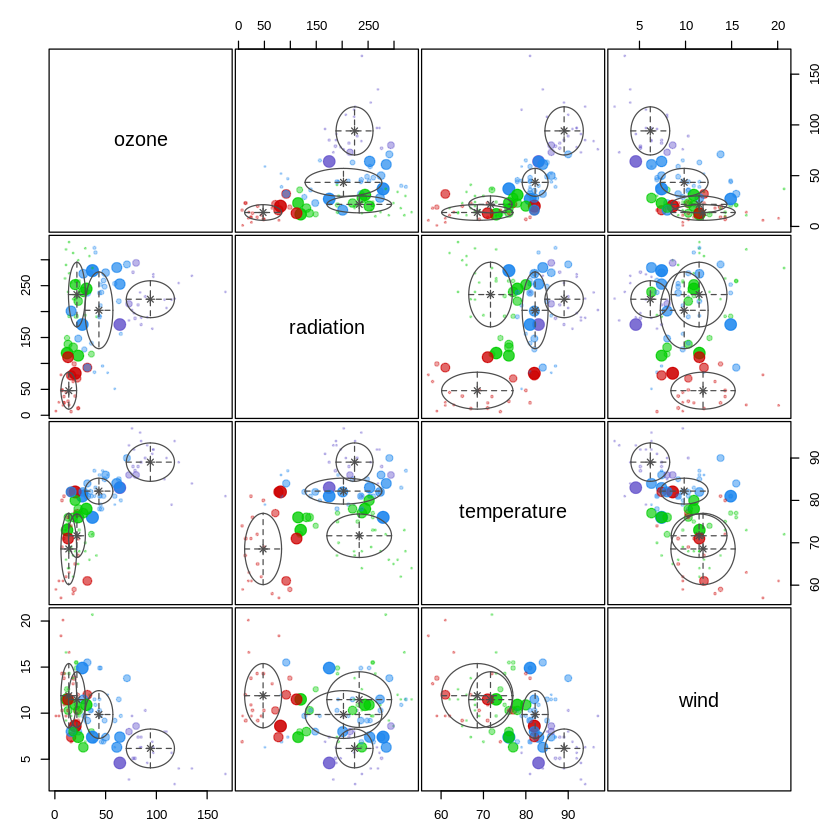

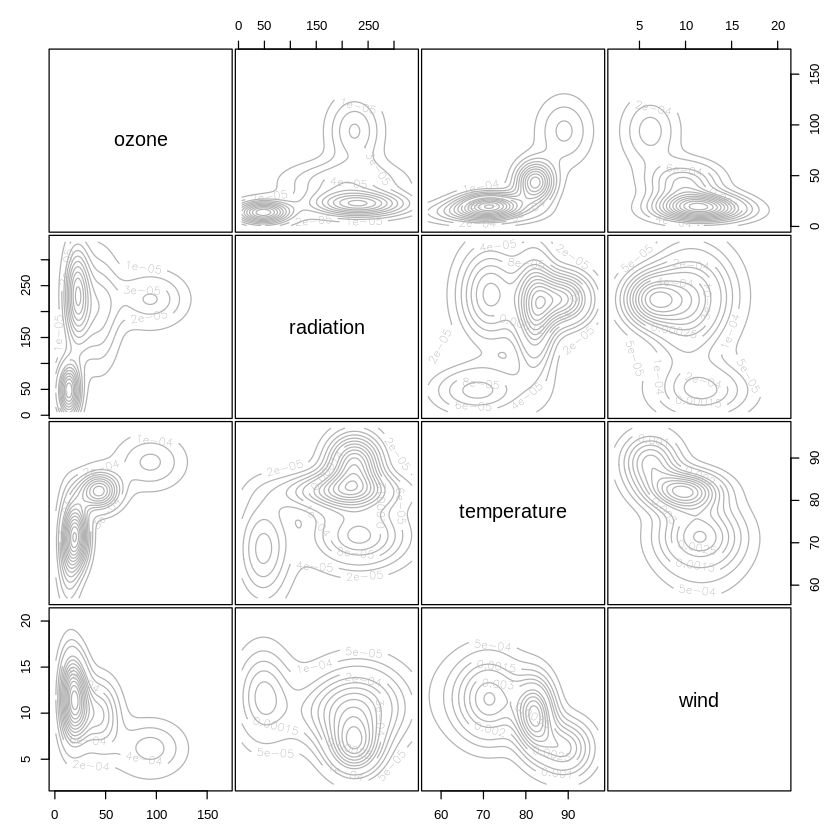

In [29]:
clus <-Mclust(datos)
summary(clus)
plot(clus)
#clus




Una vez visto las opciones que entrega GMM cuando no se fija la cantidad de grupos a priori he decidido utilizar 
el primer maximo local correspondiente a dos grupos, en mi cabeza igual van haciendo sentido (lo primero que vino a mi cabeza fue intentsr agrupar por estaciones del año (primeravera, verano en este caso, vamos a descrubrir si pasa algo asi)) la agrupacion con mejores resultados para BIC fue utilizando una gaussiana:

EVE (ellipsoidal, equal volume and orientation)

In [24]:
names(clus)

[1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"

In [30]:
clus <-Mclust(datos,2)
cl <- clus$classification
centers <- t(clus$parameters$mean)
centers



ozone,radiation,temperature,wind
19.42333,157.6711,71.32073,11.451444
68.94442,216.9212,85.45491,8.147883


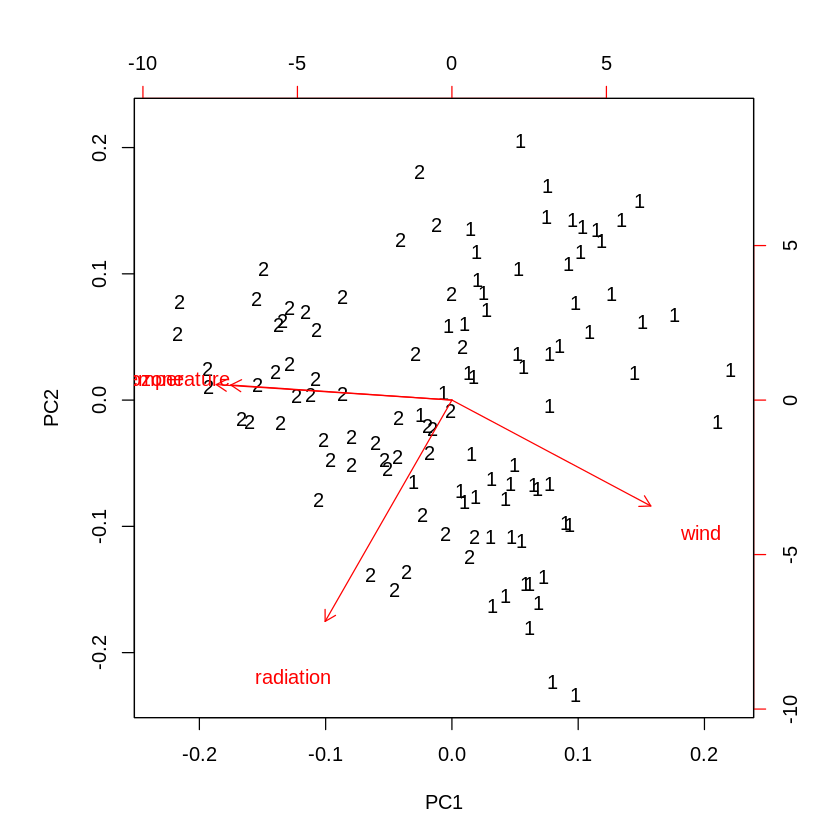

In [32]:
biplot(pca_res, xlabs= cl)

In [34]:
print(data.frame(datos,cl))

    ozone radiation temperature wind cl
1      41       190          67  7.4  1
2      36       118          72  8.0  1
3      12       149          74 12.6  1
4      18       313          62 11.5  1
5      23       299          65  8.6  1
6      19        99          59 13.8  1
7       8        19          61 20.1  1
8      16       256          69  9.7  1
9      11       290          66  9.2  1
10     14       274          68 10.9  1
11     18        65          58 13.2  1
12     14       334          64 11.5  1
13     34       307          66 12.0  1
14      6        78          57 18.4  1
15     30       322          68 11.5  1
16     11        44          62  9.7  1
17      1         8          59  9.7  1
18     11       320          73 16.6  1
19      4        25          61  9.7  1
20     32        92          61 12.0  1
21     23        13          67 12.0  1
22     45       252          81 14.9  2
23    115       223          79  5.7  2
24     37       279          76  7.4  1


Claramente para validar la hipotesis que tenia en mi cabeza ( que se gruparian por primavera y verano (solo por las fechas en las que fueron tomados estos) tendria que haber quedado algo del estilo: todos los de la primera parte de la tabla corresponder a un grupo, hasta llegar al cambio de estacion en junio 21 y despues de esta fecha deberian haber empezado a haber mas del otro grupo. Al parecer se estan agrupando principalmente por la influencia de la temperatura ya que en grafico que se presenta se ve claramente que solo hay elementos del grupo 2 cuando comenzamos a desplazarnos por el aumento de temperatura en el grafico de PCA